##Read and Show Sample Images

In [26]:
from astropy.io import fits
import matplotlib.pyplot as plt
%matplotlib inline

In [27]:
import pandas as pd

In [28]:
import pyfits

In [29]:
import sunpy.map

##PyFits Library 

In [30]:
path = "/Users/Alexander/NASA/NASA_Sample_Data/fd_M_96m_01d.6543.0000.fits"

In [31]:
fits_file = pyfits.open(path)

In [32]:
data = pyfits.getdata(path)

In [33]:
data

array([[ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       ..., 
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan]], dtype=float32)

##SunPy Library

In [8]:
mymap =sunpy.map.Map(path)

In [22]:
mymap.data

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]], dtype=float32)

In [46]:
mymap.instrument

'MDI'

In [13]:
df = pd.DataFrame(mymap.data)

In [19]:
df.fillna(value=0, inplace=True)

In [42]:
data = df.values.tolist()

###Load 4.2 MB Image

In [34]:
path = "/Users/Alexander/NASA/NASA_Sample_Data/fd_M_96m_01d.6543.0000.fits"

In [35]:
hdulist = fits.open(path)

In [36]:
type(hdulist)

astropy.io.fits.hdu.hdulist.HDUList

In [37]:
# meta-data of image 
hdulist.info()

Filename: /Users/Alexander/NASA/NASA_Sample_Data/fd_M_96m_01d.6543.0000.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU     182   (1024, 1024)   float32   


In [38]:
# refer to hud number 0 
hdu = hdulist[0]

In [39]:
# hdu has numpy array and dictionary methods
# let's treat it as an array
hdu.data.shape

(1024, 1024)

In [40]:
# view header
hdu.header

SIMPLE  =                    T / file conforms with FITS standard; SOI V6R1B0   
BITPIX  =                  -32                                                  
NAXIS   =                    2                                                  
NAXIS1  =                 1024                                                  
NAXIS2  =                 1024                                                  
COMMENT Data from the Solar Oscillations Investigation / Michelson Doppler      
COMMENT   Imager (SOI/MDI) on the Solar and Heliospheric Observatory (SOHO).    
COMMENT For information on data rights, keyword definitions, and up-to-date     
COMMENT   reports on known problems and data quality, see:                      
COMMENT   http://soi.stanford.edu/data.html                                     
HISTORY created by mdical Mon Dec  6 15:59:51 2010                              
HISTORY created by MDI_image_reconstructor Thu Dec  9 10:03:53 2010             
HISTORY An MDI magnetogram z

###For the SOHO/MDI data

    X0 = [(MDI_X0 - 511.5 - X_OPAXIS)*MAGNIFY - X_OFFSET + 512.0]/X_SCALE - 0.5


    X0          Distance along x-axis to center of solar disk from first pixel center in array pixels

    MDI_X0  	Full Disk Image x-center in pixels. Value taken from pointing info

    X_OPAXIS	Instrument field of view axis (i.e. optical axis)            
                arc-seconds from the center of the Sun's disk, plus to the 
                West (North).location wrt full disk magnification 
                instrument ccd center.  This is the current HR center 
                location on the fd optical axis on the ccd. in fd case 
                this is 0.0, 0.0 in hr it is (516.6-511.5) and 
                (573.0-511.5) for X,Y, i.e. (5.1, 61.5)

    X_OFFSET	Sampled field of view origin distance from full field of 
                view origin. Units are CCD pixels.  These offsets are 
                always non-negative. They are zero in full-disk, full CCD 
                field of view case. There is some small correction (see 
                gather_xy_rsun) in vw_V case. In the extracted image 
                cases, these parameters are determined from COFF 
                parameter.  For binned data where the center of the lower 
                left bin is offset from the center of the lower left pixel 
                in the CCD X_OFFSET is computed as that distance in pixels 
                divided by the binning. I.e. for flux budget it is 3.5/8.0

    X_SCALE 	CCD pixels per bin. X{Y}_SCALE are the size of image 
                elements in units of CCD pixels where the pixels are each 
                of angular size IM_SCALE. If the pixels are rectangular 
                X_SCALE, Y_SCALE, and IM_SCALE should form a consistent 
                set. For MDI these scale factors for X and Y include the 
                high-res vs. full disk and the binning information.

    IM_SCALE = FD_SCALE/MAGNIFY Nominal pixel scale in arc-seconds/pixel.

    XSCALE = X_SCALE * IM_SCALE

    MAGNIFY 	Magnification factor used. The value is 1 for all images 
                other than high-resolution magnetograms, in which case 
                it takes on the value of HR_MAG

    HR_MAG  	Magnification factor of the high-resolution magnetograms 
                with respect to the full-
                disk images. The current value is 3.267

    FD_SCALE	Nominal full-disk plate scale = 1.97784

In [169]:
print hdu.header["MDI_X0"]
print hdu.header["X_OPAXIS"]
print hdu.header["X_OFFSET"]
print ""
print hdu.header["X_SCALE"]
print hdu.header["IM_SCALE"]
print hdu.header["X_SCALE"] * hdu.header["IM_SCALE"]
print ""
print hdu.header["MAGNIFY"]
print hdu.header["HR_MAG"]
print hdu.header["FD_SCALE"]

511.467993418
0.0
0

1
1.98568625424
1.98568625424

1.0
3.267
1.98568625424


###Read in image parameters

    Parameter Name, Units, Description|

In [182]:

print "x0 = {}, pixel, Distance along x-axis to center of solar disk from first pixel center in array pixels".format(hdu.header["X0"])
print "y0 = {}, pixel, Distance along y-axis to center of solar disk from first pixel center in array pixels.".format(hdu.header["Y0"])
print "p0 = {}, degrees, Position angle of solar north".format(hdu.header["P_ANGLE"])
print "b0 = {},  degrees, Latitude at disk center".format(hdu.header["OBS_B0"])

print "\nclon1   = {}, units, Heliographic Longitude of the observer's disk center".format(hdu.header["OBS_L0"])
print "s0      = {}, arc seconds, Apparent semi-diameter of Sun in arc seconds from SOHO".format(hdu.header["OBS_R0"])
print "pixsize = {}, arc seconds per pixel, pixel size".format(hdu.header["FD_SCALE"])
print "time1   = {}, units, Local On Board Time of start of data".format(hdu.header["OBT_TIME"])
print "\nr0    = s0/pixsize, pixsize, semi-diameter normalized by pixel size"

x0 = 511.467993418, pixel, Distance along x-axis to center of solar disk from first pixel center in array pixels
y0 = 511.036593119, pixel, Distance along y-axis to center of solar disk from first pixel center in array pixels.
p0 = -172.809475549, degrees, Position angle of solar north
b0 = 0.945291883563,  degrees, Latitude at disk center

clon1   = 303.450929265, units, Heliographic Longitude of the observer's disk center
s0      = 981.992464941, arc seconds, Apparent semi-diameter of Sun in arc seconds from SOHO
pixsize = 1.98568625424, arc seconds per pixel, pixel size
time1   = 1669852740.0, units, Local On Board Time of start of data

r0    = s0/pixsize, pixsize, semi-diameter normalized by pixel size


### Correct (x0,y0) for MDI counting system ((-0.5,-0.5) at lower left)

    Need to shift point from center of pixel to lower left of pixel
    x0 = x0 + 0.5
    y0 = y0 + 0.5
### Correct p0 for CCD misalignment
    Correct for the misalignment of the CCD with the sattlite
    p0 = p0 – 0.21

In [163]:
x0 = hdu.header["X0"]
y0 = hdu.header["Y0"]
pixsize = hdu.header["FD_SCALE"]
p0 = hdu.header["P_ANGLE"]
s0 = hdu.header["OBS_R0"]
r0 = s0/pixsize

x0 = x0 + 0.5
y0 = y0 + 0.5
p0 = p0 - 0.21

524255.2252604416

In [180]:
print s0, pixsize
print r0
print p0
print x0
print y0

981.992464941 1.98568625424
494.535560611
-173.019475549
511.967993418
511.536593119


###Clean Data

In [11]:
df = pd.DataFrame(hdu.data)

In [15]:
df.fillna(value=0,inplace=True)

In [21]:
clean_data = df.values

In [50]:
print "min = ",clean_data.min()
print "max = ",clean_data.max()
print 'mean = ',clean_data.mean()
print "var = ",clean_data.var()

min =  -1988.29
max =  1846.16
mean =  -0.130777
var =  1040.59


(-100, 70000)

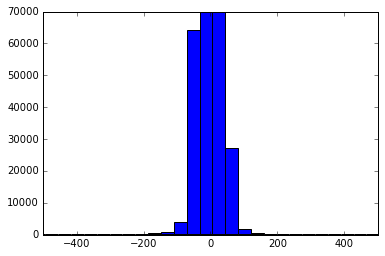

In [49]:
plt.hist(clean_data.flat,bins=100);
plt.xlim((-500,500));
plt.ylim((-100,70000));

In [76]:
clean_data

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]], dtype=float32)

###Identify relevent features

In [63]:
# P_ANGLE = Angular location of the solar north pole on the image after mappings have been performed
print "P_ANGLE = {}".format(hdu.header["P_ANGLE"])
# OBS_B0 = Heliographic Latitude of the observer's disk center
print "B_ANGLE = {}".format(hdu.header["OBS_B0"])
# Sun-center as observed from Earth
print "(CENTER_X, CENTER_Y) = ({0}, {1})".format(hdu.header["CENTER_X"],hdu.header["CENTER_Y"])
# EARTH_R0 = Radius of the Sun in arc seconds, as viewed from earth.
print "Solar_Radius = {} arcsec".format(hdu.header["EARTH_R0"])
print "Semi-diam = {}".format(hdu.header["SEMIDIAM"])

P_ANGLE = -172.809475549
B_ANGLE = 0.945291883563
(CENTER_X, CENTER_Y) = (512.467993418, 512.036593119)
Solar_Radius = 973.093603336 arcsec
Semi-diam = 0.00476083381859


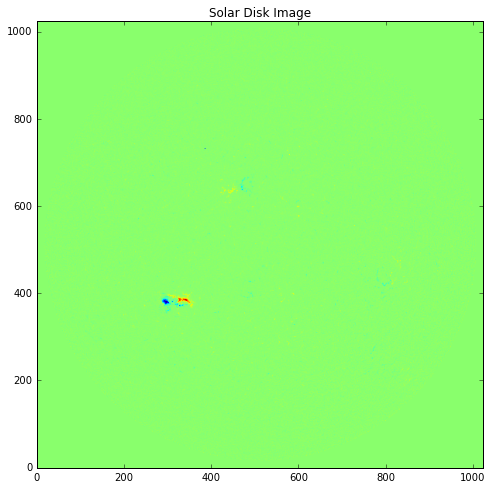

In [65]:
plt.figure(figsize = (15,8));
plt.imshow(hdu.data, origin='lower');
plt.title("Solar Disk Image")
plt.show()

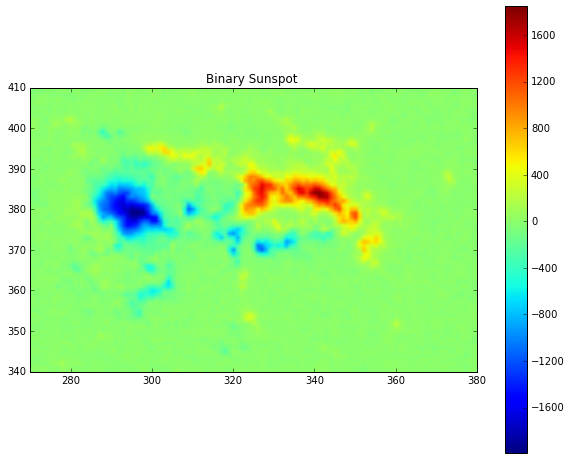

In [66]:
plt.figure(figsize = (10,8));
plt.imshow(hdu.data, origin='lower');
plt.ylim((340,410))
plt.xlim((270,380))
plt.title("Binary Sunspot ")
plt.colorbar()
plt.show()

###Load 67.1 MB Image

In [68]:
path2 = "/Users/Alexander/NASA/NASA_Sample_Data/HMI.m2010.12.01_00.00.00.fits"

In [69]:
hdulist2 = fits.open(path2)

In [70]:
# meta-data of image 
hdulist2.info()

Filename: /Users/Alexander/NASA/NASA_Sample_Data/HMI.m2010.12.01_00.00.00.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU       8   ()              
1                ImageHDU       100   (4096, 4096)   int32 (rescales to float64)   


In [71]:
# David mentioned that the larger file would be nested
# refer to hud number 0 
hdu_2 = hdulist2[1]

In [72]:
hdu_2.data.shape

(4096, 4096)

In [73]:
# view header
hdu_2.header

 [astropy.io.fits.verify]



XTENSION= 'IMAGE   '           / IMAGE extension                                
BITPIX  =                  -64 / number of bits per data pixel                  
NAXIS   =                    2 / number of data axes                            
NAXIS1  =                 4096 / length of data axis 1                          
NAXIS2  =                 4096 / length of data axis 2                          
PCOUNT  =                    0 / required keyword; must = 0                     
GCOUNT  =                    1 / required keyword; must = 1                     
DATE    = '2010-12-11T02:56:52'                                                 
DATE-OBS= '2010-11-30T23:58:11.60'                                              
TELESCOP= 'SDO/HMI'                                                             
INSTRUME= 'HMI_SIDE1'                                                           
WAVELNTH= 6173.0                                                                
CAMERA  =                   

###Extract Parameters for Spatial Frame of Reference

In [137]:
# read in image parameters
print "x0      = {:.4}, Disk center x-coordinate, lower left = (1,1)".format(hdu_2.header["CRPIX1"])
print "y0      = {:.4}, Disk center y-coordinate, lower left = (1,1)".format(hdu_2.header["CRPIX2"])
print "p0      = {:.4},     P_Angle, Position angle of solar north".format(hdu_2.header["CROTA2"])
print "b0      = {:.4},    Latitude at disk center".format(hdu_2.header["CRLT_OBS"])
print "clon1   = {:.4}      ?".format(hdu_2.header["CRLN_OBS"])
print "s0      = {:.4}      ?".format(hdu_2.header["RSUN_OBS"])
print "pixsize = {:.4},    pixel size".format(hdu_2.header["CDELT1"])
print "Need r0 = s0/pixsize, Also need to find out what this means"

x0      = 2.039e+03, Disk center x-coordinate, lower left = (1,1)
y0      = 2.046e+03, Disk center y-coordinate, lower left = (1,1)
p0      = 180.1,     P_Angle, Position angle of solar north
b0      = 0.9188,    Latitude at disk center
clon1   = 303.8      ?
s0      = 973.1      ?
pixsize = 0.5043,    pixel size
Need r0 = s0/pixsize, Also need to find out what this means


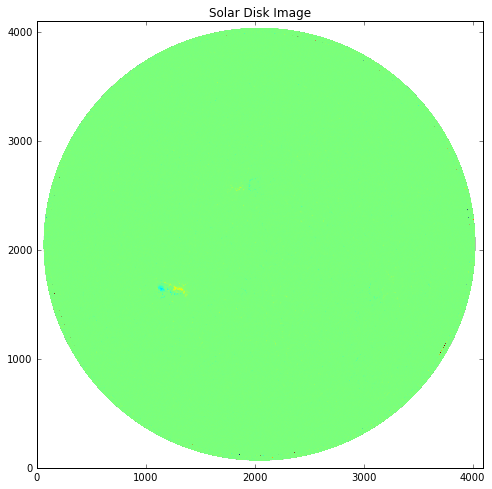

In [74]:
plt.figure(figsize = (15,8));
plt.imshow(hdu_2.data, origin='lower');
plt.title("Solar Disk Image")
plt.show()

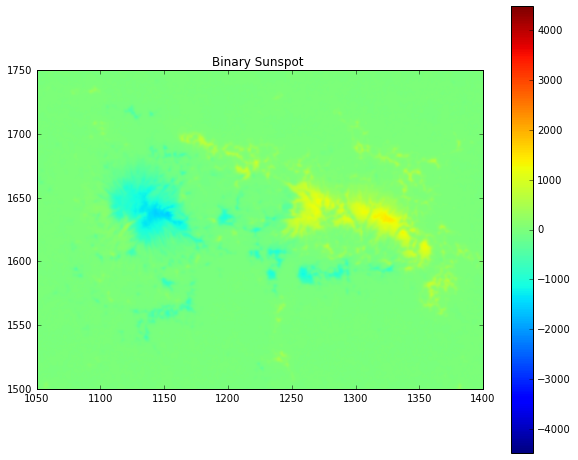

In [75]:
plt.figure(figsize = (10,8));
plt.imshow(hdu_2.data, origin='lower');
plt.ylim((1500,1750))
plt.xlim((1050,1400))
plt.title("Binary Sunspot ")
plt.colorbar()
plt.show()